# <font color='blue'>Credit Card Fraud Detecion</font>

## Table of Contents 
9. [Classification Models](#i_ID)

    9.1 [Logistic Regression with 10-fold Cross-validation](#i1_ID)
    
    9.2 [Naive Bayes](#i2_ID)
    
    9.3 [KNN Classifier](#i3_ID)

## <a id="i_ID">9. Classification Models</a>

The seven classification models are logistic regression, Naive Bayes classifier, KNN classifier, Decision tree classifier, Random forest classifier, SVM classifier, MLP classifer, without RFE or PCA, with RFE, and with PCA. A total of 21 models are evaluated.

In [92]:
# Subset X train data with selected features
X_train_rfe = X_train_sc_smote[["Time", "V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20", "V22", "V23", "V26", "V27", "V28", "Amount"]]
X_train_rfe

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V17,V18,V19,V20,V22,V23,V26,V27,V28,Amount
0,-1.535296,0.351762,-0.500795,0.593660,0.523703,-0.579075,0.516214,-0.527687,0.289567,1.563867,...,0.666107,0.098571,-1.314695,0.206726,-0.086176,-0.072836,0.780781,-0.138826,0.109658,0.509071
1,-1.198654,-0.566635,0.624540,0.835329,-0.682127,-0.089419,0.417702,-0.681916,-2.100175,0.166423,...,-0.654650,0.038077,-0.216072,0.975068,1.131440,-0.222373,2.138311,0.699143,0.612125,-0.291531
2,1.008918,1.006160,-0.370358,-0.225330,0.227813,-0.536617,-0.030047,-0.701278,0.176174,1.122688,...,-0.849029,0.795924,0.100894,-0.347990,0.911894,0.214323,1.197337,-0.077707,-0.196924,-0.315549
3,1.492265,0.907519,0.154829,-0.149127,2.306478,0.782434,2.029608,-0.577631,0.615145,-0.776495,...,-0.856152,-1.296203,-2.579611,-0.331388,-0.281399,0.720081,-0.627499,0.141029,-0.136791,-0.351576
4,0.619802,0.961135,0.071901,-1.329142,0.767343,0.638958,-0.478144,0.657484,-0.286411,-0.507138,...,-0.815790,-0.086624,-0.240815,-0.048324,0.793919,-0.098555,-1.130931,-0.125726,-0.157990,-0.011320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424861,-1.814848,-0.903876,2.108705,-3.110692,2.129984,-1.569743,-1.734457,-3.485985,1.380353,-1.103438,...,-7.453020,-1.531103,0.817794,0.669991,-0.550626,0.169589,0.646236,1.469934,0.853927,-0.347573
424862,-1.827962,-0.864227,2.029195,-2.651487,1.751551,-1.193544,-1.684474,-2.811120,1.245476,-0.929779,...,-5.399375,-1.005911,0.103265,0.443404,-0.771976,-0.038182,0.650756,0.954024,0.553117,-0.347573
424863,-0.706922,-0.196450,-0.322743,0.170903,0.309774,0.017954,-0.093624,0.365813,-0.223656,-0.357212,...,-0.495589,0.304100,-1.088870,-1.081571,-0.615633,-0.457783,-0.950073,0.076029,0.138565,0.355592
424864,0.772097,0.486984,0.907723,-2.886068,2.609549,-0.231679,-0.608149,-1.913229,0.558176,-0.711312,...,-2.937845,0.129939,-0.193866,0.512260,0.609263,-0.329593,-0.377920,1.566194,0.942041,-0.136318


In [93]:
# Create dataframe with scaled X test data
df_2 = pd.DataFrame(X_test_sc, columns = ["Time", "V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20", "V21", "V22", "V23", "V24", "V25", "V26", "V27", "V28", "Amount"])
#df_2

In [94]:
# Subset X test data with selected features
X_test_rfe = df_2[["Time", "V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20", "V22", "V23", "V26", "V27", "V28", "Amount"]]
X_test_rfe

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V17,V18,V19,V20,V22,V23,V26,V27,V28,Amount
0,-0.541339,0.532325,-0.451390,0.106290,0.471926,0.823042,3.592607,-1.286340,1.117282,1.428482,...,-0.220744,0.270836,0.661376,0.064868,-0.044860,-0.277746,-0.453108,0.256014,0.118848,-0.128777
1,-0.297442,-2.442473,2.610237,-0.608590,-0.635383,-0.647578,-0.593118,0.270429,0.500496,2.509212,...,0.178984,-1.132836,-1.146412,2.687556,-1.049770,0.240204,0.019417,1.091174,-1.308897,-0.315089
2,-1.131650,-0.789799,-0.150004,1.033593,-1.439221,-0.273696,-1.008606,0.134599,-0.017722,-1.343700,...,-0.421597,0.886261,-1.783484,-0.430475,-1.315635,-0.238984,2.306768,-1.273816,-0.747208,-0.168418
3,-1.985435,0.106866,0.403157,0.865704,0.121023,-0.301823,-0.392928,-0.034329,-0.709868,-0.482173,...,-0.673512,-0.121177,0.002695,-0.228493,-1.329706,-0.022586,0.297650,0.112048,0.380093,-0.338874
4,1.390508,-0.141753,0.500385,0.368985,0.273507,0.993784,1.492061,0.265172,0.438964,-0.813240,...,1.078822,0.026860,2.575595,0.215565,1.600293,-0.905168,1.161402,0.324701,0.141082,-0.342838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70927,1.313866,-0.430452,0.456316,-0.538911,0.664789,0.061693,0.101684,1.253490,0.374964,-0.772639,...,0.247460,0.663149,1.232974,0.384450,0.708843,0.522640,-0.885816,0.546808,0.564698,0.537189
70928,1.269529,1.044372,0.367302,-2.105797,0.438979,0.903753,-1.034673,0.562940,-0.254930,-0.124512,...,2.372229,1.327738,-0.028363,-0.197497,0.094463,-0.066481,1.382534,-0.229371,-0.073449,-0.350766
70929,-1.276736,0.578876,0.263610,-0.413349,0.474843,0.326902,-0.167114,0.061263,0.148377,-0.246305,...,1.689336,-0.013166,-0.972081,-0.238541,-0.184152,-0.035221,0.867470,-0.023491,0.069166,-0.350766
70930,1.133863,-0.167043,0.037481,0.510938,-0.703720,0.742325,0.632725,0.479276,-0.191561,0.883539,...,-1.773476,1.460208,0.446476,-0.089949,1.565077,-0.542990,-0.777809,-0.811173,-0.576411,-0.156526


In [95]:
# Check y test data is representative of both 0 and 1 classes
y_test.value_counts() #yes, it is

0    70820
1      112
Name: Class, dtype: int64

In [96]:
# Without RFE or PCA
print(X_train_sc_smote.shape) # X train set
print(y_train_smote.shape) # y train set
print(X_test_sc.shape) # X test set
print(y_test.shape) # y test set

# With RFE
print(X_train_rfe.shape) # X train set
print(y_train_smote.shape) # y train set
print(X_test_rfe.shape) # X test set
print(y_test.shape) # y tset set

# With PCA
print(X_smote_pca_15.shape) # X train set
print(y_train_smote.shape) # y train set
print(X_test_pca_15.shape) # X test set
print(y_test.shape) # y test set

(424866, 30)
(424866,)
(70932, 30)
(70932,)
(424866, 27)
(424866,)
(70932, 27)
(70932,)
(424866, 15)
(424866,)
(70932, 15)
(70932,)


### <a id="i1_ID">9.1 Logistic Regression with 10-fold Cross-validation</a>

### Without RFE or PCA

In [322]:
# Train a logistic regression model on the train set
from sklearn.linear_model import LogisticRegressionCV
logreg = LogisticRegressionCV(max_iter=5000, random_state = 25)
logreg.fit(X_train_sc_smote, y_train_smote)

LogisticRegressionCV(max_iter=5000, random_state=25)

In [323]:
# Make class predictions for the test set
y_pred_class = logreg.predict(X_test_sc)

In [327]:
# Confusion matrix
# Note: first argument is true values, second argument is predicted values
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
cm

array([[68991,  1829],
       [   10,   102]], dtype=int64)

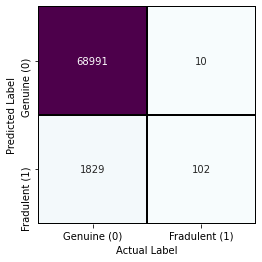

In [329]:
import matplotlib.pyplot as plt
import seaborn as sns;
faceLabels = ['Genuine (0)','Fradulent (1)']
mat = confusion_matrix(y_test, y_pred_class)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = faceLabels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = faceLabels)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label');
plt.show()

In [330]:
# Save confusion matrix and slice into four sections
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print("True Positive: ",TP)
print("True Negative: ",TN)
print("False Positive: ",FP)
print("False Negative: ",FN)

[[68991  1829]
 [   10   102]]
True Positive:  102
True Negative:  68991
False Positive:  1829
False Negative:  10


In [331]:
# Classification Accuracy
#print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.9740737607849772


In [332]:
# Classification Error
#print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.025926239215022795


In [343]:
# Sensitivity or Recall
recall = (TP / float(TP + FN))
#print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.9107142857142857


In [344]:
# Specificity
print(TN / float(TN + FP))

0.9741739621575826


In [345]:
# Precision
precision = (TP / float(TP + FP))
print(TP / float(TP + FP))

0.05282237182806836


In [346]:
# False Positive Rate
print(FP / float(TN + FP))

0.025826037842417396


In [347]:
# F-measure
print((2 * precision * recall) / (precision + recall))

0.09985315712187959


In [348]:
# AUC
print(metrics.roc_auc_score(y_test, y_pred_class))

0.942444123935934


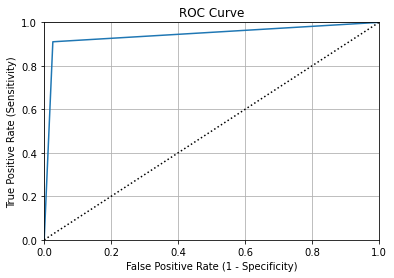

In [350]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_class)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle=':', c='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [351]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     70820
           1       0.05      0.91      0.10       112

    accuracy                           0.97     70932
   macro avg       0.53      0.94      0.54     70932
weighted avg       1.00      0.97      0.99     70932



### With RFE

In [352]:
# Train a logistic regression model on the train set
from sklearn.linear_model import LogisticRegressionCV
logreg = LogisticRegressionCV(max_iter=5000, random_state = 25)
logreg.fit(X_train_rfe, y_train_smote)

LogisticRegressionCV(max_iter=5000, random_state=25)

In [353]:
# Make class predictions for the test set
y_pred_class = logreg.predict(X_test_rfe)

In [355]:
# Confusion matrix
# Note: first argument is true values, second argument is predicted values
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
cm

array([[68984,  1836],
       [   10,   102]], dtype=int64)

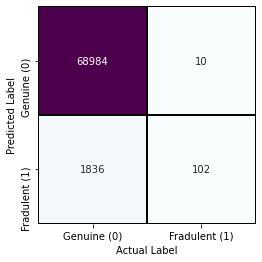

In [360]:
import matplotlib.pyplot as plt
import seaborn as sns;
faceLabels = ['Genuine (0)','Fradulent (1)']
mat = confusion_matrix(y_test, y_pred_class)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = faceLabels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = faceLabels)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label');
plt.show()

In [361]:
# Save confusion matrix and slice into four sections
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print("True Positive: ",TP)
print("True Negative: ",TN)
print("False Positive: ",FP)
print("False Negative: ",FN)

[[68984  1836]
 [   10   102]]
True Positive:  102
True Negative:  68984
False Positive:  1836
False Negative:  10


In [362]:
# Classification Accuracy
#print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.9739750747194497


In [363]:
# Classification Error
#print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.026024925280550337


In [364]:
# Sensitivity or Recall
recall = (TP / float(TP + FN))
#print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.9107142857142857


In [365]:
# Specificity
print(TN / float(TN + FP))

0.9740751200225924


In [366]:
# Precision
precision = (TP / float(TP + FP))
print(TP / float(TP + FP))

0.05263157894736842


In [367]:
# False Positive Rate
print(FP / float(TN + FP))

0.02592487997740751


In [368]:
# F-measure
print((2 * precision * recall) / (precision + recall))

0.09951219512195121


In [369]:
# AUC
print(metrics.roc_auc_score(y_test, y_pred_class))

0.942394702868439


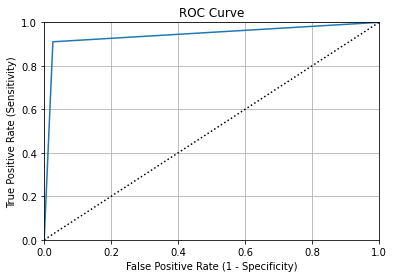

In [370]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_class)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle=':', c='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [371]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     70820
           1       0.05      0.91      0.10       112

    accuracy                           0.97     70932
   macro avg       0.53      0.94      0.54     70932
weighted avg       1.00      0.97      0.99     70932



### With PCA

In [372]:
# Train a logistic regression model on the train set
from sklearn.linear_model import LogisticRegressionCV
logreg = LogisticRegressionCV(max_iter=5000, random_state = 25)
logreg.fit(X_smote_pca_15, y_train_smote)

LogisticRegressionCV(max_iter=5000, random_state=25)

In [373]:
# Make class predictions for the test set
y_pred_class = logreg.predict(X_test_pca_15)

In [375]:
# Confusion matrix
# Note: first argument is true values, second argument is predicted values
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
cm

array([[68934,  1886],
       [   12,   100]], dtype=int64)

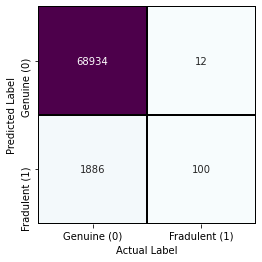

In [376]:
import matplotlib.pyplot as plt
import seaborn as sns;
faceLabels = ['Genuine (0)','Fradulent (1)']
mat = confusion_matrix(y_test, y_pred_class)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = faceLabels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = faceLabels)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label');
plt.show()

In [377]:
# Save confusion matrix and slice into four sections
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print("True Positive: ",TP)
print("True Negative: ",TN)
print("False Positive: ",FP)
print("False Negative: ",FN)

[[68934  1886]
 [   12   100]]
True Positive:  100
True Negative:  68934
False Positive:  1886
False Negative:  12


In [378]:
# Classification Accuracy
#print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.9732419782326736


In [379]:
# Classification Error
#print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.026758021767326445


In [380]:
# Sensitivity or Recall
recall = (TP / float(TP + FN))
#print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.8928571428571429


In [381]:
# Specificity
print(TN / float(TN + FP))

0.9733691047726631


In [382]:
# Precision
precision = (TP / float(TP + FP))
print(TP / float(TP + FP))

0.050352467270896276


In [383]:
# False Positive Rate
print(FP / float(TN + FP))

0.02663089522733691


In [384]:
# F-measure
print((2 * precision * recall) / (precision + recall))

0.09532888465204957


In [385]:
# AUC
print(metrics.roc_auc_score(y_test, y_pred_class))

0.933113123814903


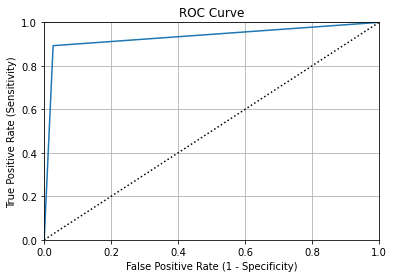

In [386]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_class)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle=':', c='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [387]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     70820
           1       0.05      0.89      0.10       112

    accuracy                           0.97     70932
   macro avg       0.53      0.93      0.54     70932
weighted avg       1.00      0.97      0.99     70932



### <a id="i2_ID">9.2 Naive Bayes</a>

### Without RFE or PCA

In [388]:
# Train a Naive Bayes model on the train set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_sc_smote, y_train_smote)

GaussianNB()

In [389]:
# Make class predictions for the test set
y_pred_class = gnb.predict(X_test_sc)

In [391]:
# Confusion matrix
# Note: first argument is true values, second argument is predicted values
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
cm

array([[69118,  1702],
       [   19,    93]], dtype=int64)

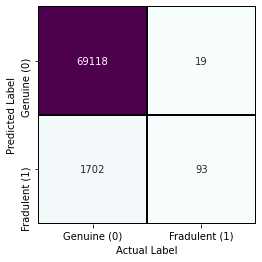

In [392]:
import matplotlib.pyplot as plt
import seaborn as sns;
faceLabels = ['Genuine (0)','Fradulent (1)']
mat = confusion_matrix(y_test, y_pred_class)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = faceLabels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = faceLabels)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label');
plt.show()

In [393]:
# Save confusion matrix and slice into four sections
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print("True Positive: ",TP)
print("True Negative: ",TN)
print("False Positive: ",FP)
print("False Negative: ",FN)

[[69118  1702]
 [   19    93]]
True Positive:  93
True Negative:  69118
False Positive:  1702
False Negative:  19


In [394]:
# Classification Accuracy
#print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.9757373258895844


In [395]:
# Classification Error
#print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.024262674110415605


In [396]:
# Sensitivity or Recall
recall = (TP / float(TP + FN))
#print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.8303571428571429


In [397]:
# Specificity
print(TN / float(TN + FP))

0.9759672408924033


In [398]:
# Precision
precision = (TP / float(TP + FP))
print(TP / float(TP + FP))

0.05181058495821727


In [399]:
# False Positive Rate
print(FP / float(TN + FP))

0.024032759107596724


In [400]:
# F-measure
print((2 * precision * recall) / (precision + recall))

0.09753539590980598


In [401]:
# AUC
print(metrics.roc_auc_score(y_test, y_pred_class))

0.903162191874773


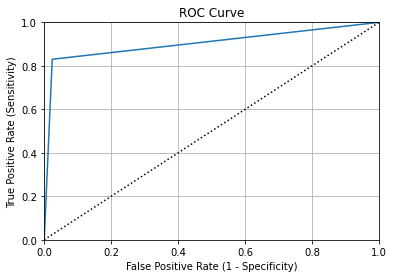

In [402]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_class)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle=':', c='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [403]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     70820
           1       0.05      0.83      0.10       112

    accuracy                           0.98     70932
   macro avg       0.53      0.90      0.54     70932
weighted avg       1.00      0.98      0.99     70932



### With RFE

In [404]:
# Train a Naive Bayes model on the train set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_rfe, y_train_smote)

GaussianNB()

In [405]:
# Make class predictions for the test set
y_pred_class = gnb.predict(X_test_rfe)

In [407]:
# Confusion matrix
# Note: first argument is true values, second argument is predicted values
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
cm

array([[69178,  1642],
       [   19,    93]], dtype=int64)

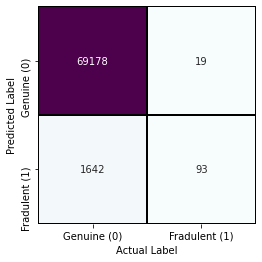

In [408]:
import matplotlib.pyplot as plt
import seaborn as sns;
faceLabels = ['Genuine (0)','Fradulent (1)']
mat = confusion_matrix(y_test, y_pred_class)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = faceLabels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = faceLabels)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label');
plt.show()

In [409]:
# Save confusion matrix and slice into four sections
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print("True Positive: ",TP)
print("True Negative: ",TN)
print("False Positive: ",FP)
print("False Negative: ",FN)

[[69178  1642]
 [   19    93]]
True Positive:  93
True Negative:  69178
False Positive:  1642
False Negative:  19


In [410]:
# Classification Accuracy
#print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.9765832064512491


In [411]:
# Classification Error
#print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.023416793548750925


In [412]:
# Sensitivity or Recall
recall = (TP / float(TP + FN))
#print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.8303571428571429


In [413]:
# Specificity
print(TN / float(TN + FP))

0.9768144591923186


In [414]:
# Precision
precision = (TP / float(TP + FP))
print(TP / float(TP + FP))

0.05360230547550432


In [415]:
# False Positive Rate
print(FP / float(TN + FP))

0.023185540807681447


In [416]:
# F-measure
print((2 * precision * recall) / (precision + recall))

0.10070384407146725


In [417]:
# AUC
print(metrics.roc_auc_score(y_test, y_pred_class))

0.9035858010247306


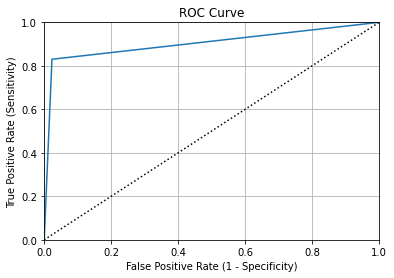

In [418]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_class)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle=':', c='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [419]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     70820
           1       0.05      0.83      0.10       112

    accuracy                           0.98     70932
   macro avg       0.53      0.90      0.54     70932
weighted avg       1.00      0.98      0.99     70932



### With PCA

In [420]:
# Train a Naive Bayes model on the train set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_smote_pca_15, y_train_smote)

GaussianNB()

In [421]:
# Make class predictions for the test set
y_pred_class = gnb.predict(X_test_pca_15)

In [423]:
# Confusion matrix
# Note: first argument is true values, second argument is predicted values
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
cm

array([[68069,  2751],
       [   15,    97]], dtype=int64)

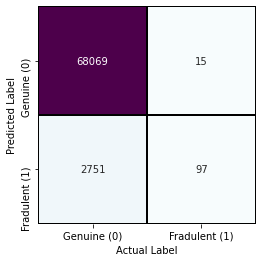

In [424]:
import matplotlib.pyplot as plt
import seaborn as sns;
faceLabels = ['Genuine (0)','Fradulent (1)']
mat = confusion_matrix(y_test, y_pred_class)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = faceLabels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = faceLabels)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label');
plt.show()

In [425]:
# Save confusion matrix and slice into four sections
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print("True Positive: ",TP)
print("True Negative: ",TN)
print("False Positive: ",FP)
print("False Negative: ",FN)

[[68069  2751]
 [   15    97]]
True Positive:  97
True Negative:  68069
False Positive:  2751
False Negative:  15


In [426]:
# Classification Accuracy
#print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.9610049061072576


In [427]:
# Classification Error
#print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.03899509389274236


In [428]:
# Sensitivity or Recall
recall = (TP / float(TP + FN))
#print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.8660714285714286


In [429]:
# Specificity
print(TN / float(TN + FP))

0.9611550409488845


In [430]:
# Precision
precision = (TP / float(TP + FP))
print(TP / float(TP + FP))

0.034058988764044944


In [431]:
# False Positive Rate
print(FP / float(TN + FP))

0.038844959051115506


In [432]:
# F-measure
print((2 * precision * recall) / (precision + recall))

0.06554054054054055


In [433]:
# AUC
print(metrics.roc_auc_score(y_test, y_pred_class))

0.9136132347601565


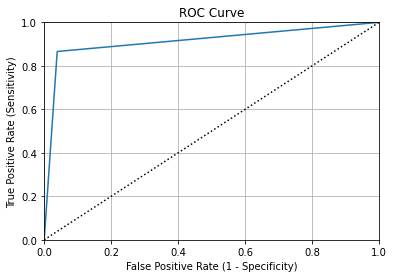

In [434]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_class)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle=':', c='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [435]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     70820
           1       0.03      0.87      0.07       112

    accuracy                           0.96     70932
   macro avg       0.52      0.91      0.52     70932
weighted avg       1.00      0.96      0.98     70932



### <a id="i3_ID">9.3 KNN Classifier</a>

### Without RFE or PCA

In [440]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [443]:
# Train a KNN classifier model on the train set
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_sc_smote, y_train_smote)

KNeighborsClassifier(n_neighbors=2)

In [444]:
# Make class predictions for the test set
y_pred_class = knn.predict(X_test_sc)

In [445]:
# Confusion matrix
# Note: first argument is true values, second argument is predicted values
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
cm

array([[70797,    23],
       [   24,    88]], dtype=int64)

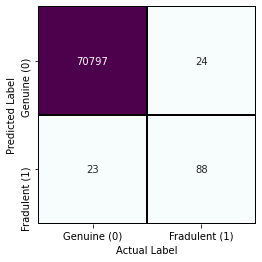

In [446]:
import matplotlib.pyplot as plt
import seaborn as sns;
faceLabels = ['Genuine (0)','Fradulent (1)']
mat = confusion_matrix(y_test, y_pred_class)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = faceLabels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = faceLabels)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label');
plt.show()

In [447]:
# Save confusion matrix and slice into four sections
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print("True Positive: ",TP)
print("True Negative: ",TN)
print("False Positive: ",FP)
print("False Negative: ",FN)

[[70797    23]
 [   24    88]]
True Positive:  88
True Negative:  70797
False Positive:  23
False Negative:  24


In [448]:
# Classification Accuracy
#print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.9993373935600294


In [449]:
# Classification Error
#print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.0006626064399706255


In [450]:
# Sensitivity or Recall
recall = (TP / float(TP + FN))
#print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.7857142857142857


In [451]:
# Specificity
print(TN / float(TN + FP))

0.9996752329850325


In [452]:
# Precision
precision = (TP / float(TP + FP))
print(TP / float(TP + FP))

0.7927927927927928


In [453]:
# False Positive Rate
print(FP / float(TN + FP))

0.0003247670149675233


In [454]:
# F-measure
print((2 * precision * recall) / (precision + recall))

0.789237668161435


In [455]:
# AUC
print(metrics.roc_auc_score(y_test, y_pred_class))

0.892694759349659


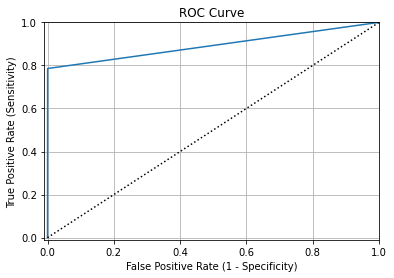

In [459]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_class)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle=':', c='black')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [460]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.79      0.79      0.79       112

    accuracy                           1.00     70932
   macro avg       0.90      0.89      0.89     70932
weighted avg       1.00      1.00      1.00     70932



### With RFE

In [461]:
# Train a KNN classifier model on the train set
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_rfe, y_train_smote)

KNeighborsClassifier(n_neighbors=2)

In [462]:
# Make class predictions for the test set
y_pred_class = knn.predict(X_test_rfe)

In [463]:
# Confusion matrix
# Note: first argument is true values, second argument is predicted values
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
cm

array([[70797,    23],
       [   24,    88]], dtype=int64)

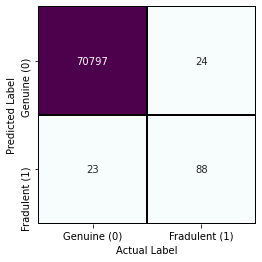

In [464]:
import matplotlib.pyplot as plt
import seaborn as sns;
faceLabels = ['Genuine (0)','Fradulent (1)']
mat = confusion_matrix(y_test, y_pred_class)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = faceLabels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = faceLabels)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label');
plt.show()

In [465]:
# Save confusion matrix and slice into four sections
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print("True Positive: ",TP)
print("True Negative: ",TN)
print("False Positive: ",FP)
print("False Negative: ",FN)

[[70797    23]
 [   24    88]]
True Positive:  88
True Negative:  70797
False Positive:  23
False Negative:  24


In [466]:
# Classification Accuracy
#print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.9993373935600294


In [467]:
# Classification Error
#print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.0006626064399706255


In [468]:
# Sensitivity or Recall
recall = (TP / float(TP + FN))
#print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.7857142857142857


In [469]:
# Specificity
print(TN / float(TN + FP))

0.9996752329850325


In [470]:
# Precision
precision = (TP / float(TP + FP))
print(TP / float(TP + FP))

0.7927927927927928


In [471]:
# False Positive Rate
print(FP / float(TN + FP))

0.0003247670149675233


In [472]:
# F-measure
print((2 * precision * recall) / (precision + recall))

0.789237668161435


In [473]:
# AUC
print(metrics.roc_auc_score(y_test, y_pred_class))

0.892694759349659


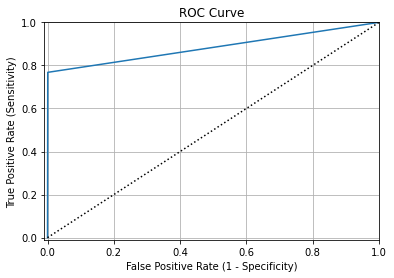

In [492]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_class)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle=':', c='black')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [475]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.79      0.79      0.79       112

    accuracy                           1.00     70932
   macro avg       0.90      0.89      0.89     70932
weighted avg       1.00      1.00      1.00     70932



### With PCA

In [476]:
# Train a KNN classifier model on the train set
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_smote_pca_15, y_train_smote)

KNeighborsClassifier(n_neighbors=2)

In [477]:
# Make class predictions for the test set
y_pred_class = knn.predict(X_test_pca_15)

In [478]:
# Confusion matrix
# Note: first argument is true values, second argument is predicted values
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
cm

array([[70769,    51],
       [   26,    86]], dtype=int64)

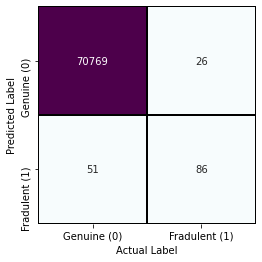

In [479]:
import matplotlib.pyplot as plt
import seaborn as sns;
faceLabels = ['Genuine (0)','Fradulent (1)']
mat = confusion_matrix(y_test, y_pred_class)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = faceLabels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = faceLabels)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label');
plt.show()

In [480]:
# Save confusion matrix and slice into four sections
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print("True Positive: ",TP)
print("True Negative: ",TN)
print("False Positive: ",FP)
print("False Negative: ",FN)

[[70769    51]
 [   26    86]]
True Positive:  86
True Negative:  70769
False Positive:  51
False Negative:  26


In [481]:
# Classification Accuracy
#print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.9989144532791969


In [482]:
# Classification Error
#print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.0010855467208030767


In [483]:
# Sensitivity or Recall
recall = (TP / float(TP + FN))
#print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.7678571428571429


In [484]:
# Specificity
print(TN / float(TN + FP))

0.999279864445072


In [485]:
# Precision
precision = (TP / float(TP + FP))
print(TP / float(TP + FP))

0.6277372262773723


In [486]:
# False Positive Rate
print(FP / float(TN + FP))

0.0007201355549279865


In [487]:
# F-measure
print((2 * precision * recall) / (precision + recall))

0.6907630522088354


In [488]:
# AUC
print(metrics.roc_auc_score(y_test, y_pred_class))

0.8835685036511074


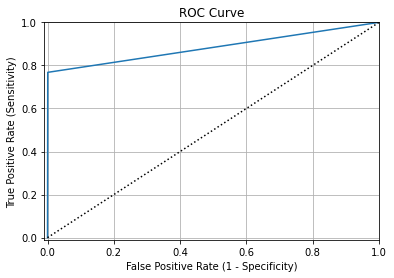

In [491]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_class)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle=':', c='black')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [490]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.63      0.77      0.69       112

    accuracy                           1.00     70932
   macro avg       0.81      0.88      0.85     70932
weighted avg       1.00      1.00      1.00     70932

